In [93]:
import os
import matplotlib.pyplot as plt

train_dir = r"C:\Users\gokul\Face Emotion Recognition\data\train"
test_dir = r"C:\Users\gokul\Face Emotion Recognition\data\test"


In [94]:
train_counts = {cls: len(os.listdir(os.path.join(train_dir, cls))) for cls in os.listdir(train_dir)}
test_counts = {cls: len(os.listdir(os.path.join(test_dir, cls))) for cls in os.listdir(test_dir)}

Train counts: {'angry': 3995, 'disgust': 436, 'fear': 4097, 'happy': 7215, 'neutral': 4965, 'sad': 4830, 'surprise': 3171}
Test counts: {'angry': 958, 'disgust': 111, 'fear': 1024, 'happy': 1774, 'neutral': 1233, 'sad': 1247, 'surprise': 831}


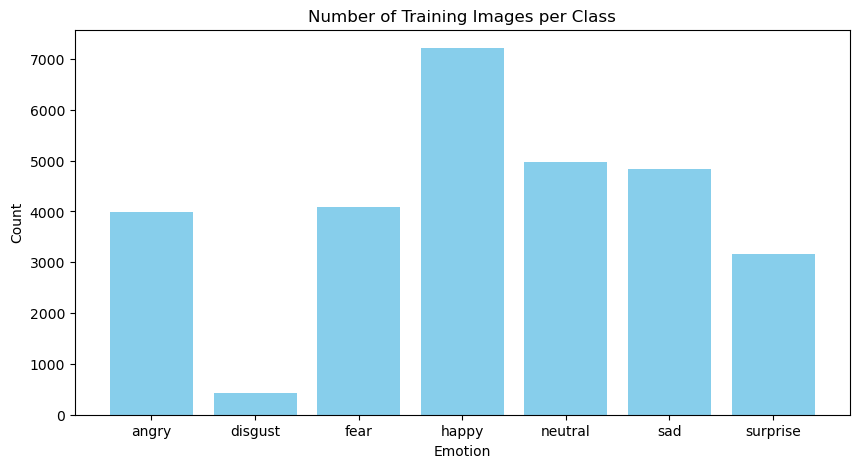

In [95]:

print("Train counts:", train_counts)
print("Test counts:", test_counts)

plt.figure(figsize=(10,5))
plt.bar(train_counts.keys(), train_counts.values(), color='skyblue')
plt.title("Number of Training Images per Class")
plt.xlabel("Emotion")
plt.ylabel("Count")
plt.show()

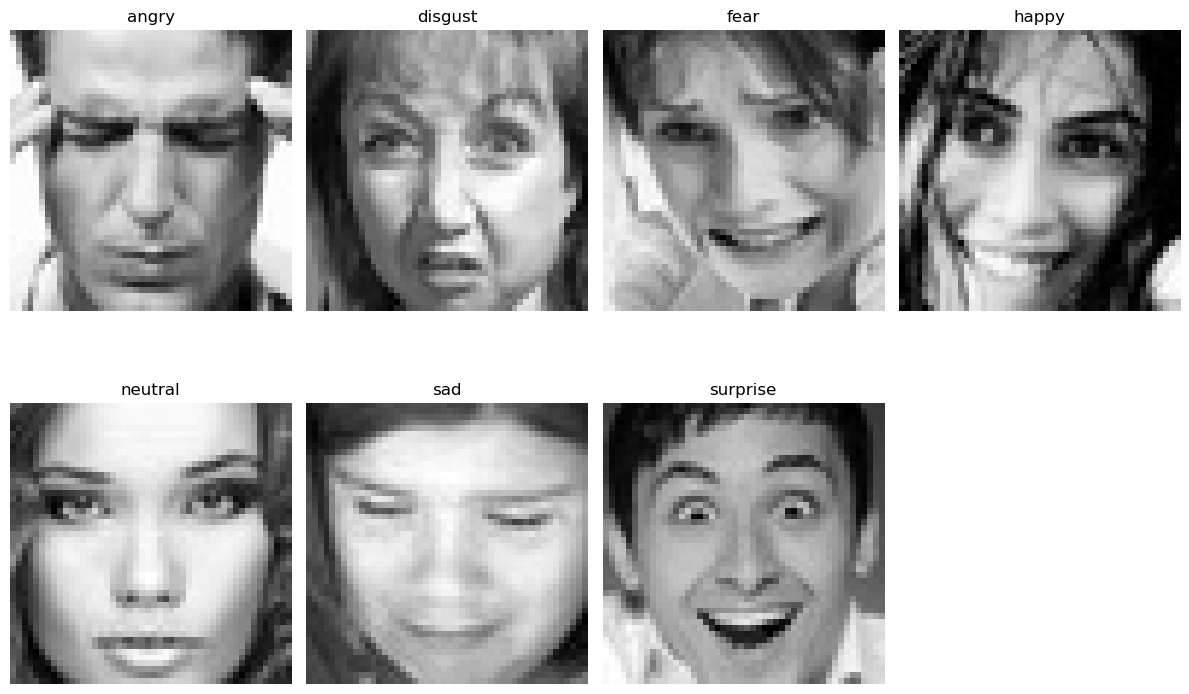

In [96]:
import cv2
import random

plt.figure(figsize=(12,8))

for i, cls in enumerate(train_counts.keys()):
    img_path = os.path.join(train_dir, cls, random.choice(os.listdir(os.path.join(train_dir, cls))))
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    plt.subplot(2,4,i+1)
    plt.imshow(img, cmap='gray')
    plt.title(cls)
    plt.axis('off')

plt.tight_layout()
plt.show()


Image shape: (48, 48)


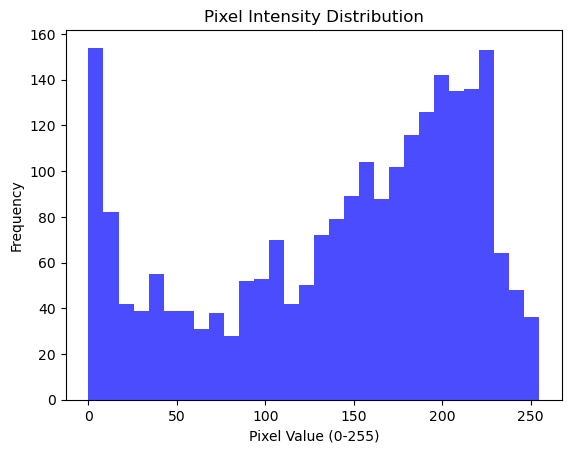

In [97]:
import numpy as np

sample_img = cv2.imread(os.path.join(train_dir, 'happy', random.choice(os.listdir(os.path.join(train_dir, 'happy')))), cv2.IMREAD_GRAYSCALE)

print("Image shape:", sample_img.shape)

plt.hist(sample_img.ravel(), bins=30, color='blue', alpha=0.7)
plt.title("Pixel Intensity Distribution")
plt.xlabel("Pixel Value (0-255)")
plt.ylabel("Frequency")
plt.show()


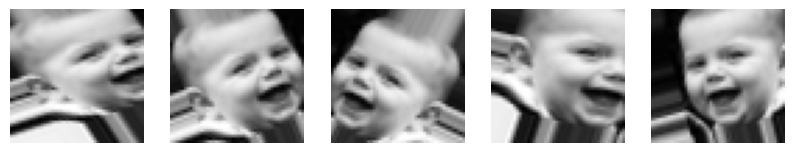

In [98]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

img = sample_img.reshape((1,) + sample_img.shape + (1,))

plt.figure(figsize=(10,4))
i = 0
for batch in datagen.flow(img, batch_size=1):
    plt.subplot(1,5,i+1)
    plt.imshow(batch[0].reshape(48,48), cmap='gray')
    plt.axis('off')
    i += 1
    if i == 5:
        break
plt.show()


In [99]:
sample_img

array([[ 41,  42,  45, ...,  17,  23,  29],
       [ 42,  41,  46, ...,  13,  29,  33],
       [ 38,  35,  38, ...,  13,  28,  34],
       ...,
       [242, 241, 240, ...,   1,  28, 189],
       [238, 238, 239, ...,   0,  80, 212],
       [242, 238, 240, ...,   4, 149, 188]], dtype=uint8)